<h1>Exercício de Classificação com uma ANN</h1>

<h2>Importando dataset</h2>

In [98]:
import pandas as pd
import numpy as np
arquivo = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data', names=['Class','Left-w','Left-d','Right-w','Right-d'])

In [99]:
#print arquivo
np_arquivo = np.array(arquivo) 

<h2>Preparando o dataset</h2>

In [100]:
y = np_arquivo[:,0]
x = np_arquivo[:,1:5]
print y

['B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'B' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'B' 'R'
 'R' 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'L' 'L' 'L' 'B' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R'
 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'B' 'L' 'L' 'R'
 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'L'
 'B' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'B' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R'
 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'B' 'R' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R'
 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'B' 'R' 'L' 'L' 'R' 'R' 'R' 'L'
 'B' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'B' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'B

In [101]:
y_convertido = y
for i in range(len(y)):
    if (y[i]=='B'):
        y_convertido[i]=0
    if (y[i]=='R'):
        y_convertido[i]=1
    if (y[i]=='L'):
        y_convertido[i]=2

In [102]:
import keras
from keras.utils import np_utils
y_convertido = np_utils.to_categorical(y_convertido)    
print y_convertido

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [130]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y_convertido, test_size = 0.2)
x_treino.shape

(500, 4)

<h2>Criano e Treinando a Rede</h2>

In [161]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers

In [162]:
modelo = Sequential()
modelo.add(Dense(50, input_dim=4, kernel_initializer='normal', activation='relu')) #entrada e primeira camada
modelo.add(Dropout(0.2))
modelo.add(Dense(50, kernel_initializer='normal', activation='relu')) #segunda camada
modelo.add(Dropout(0.2))
modelo.add(Dense(50, kernel_initializer='normal', activation='relu')) #terceira camada
modelo.add(Dropout(0.2))
modelo.add(Dense(3, kernel_initializer='normal', activation='softmax')) #saída

In [163]:
from keras.optimizers import Adam #Adadelta #Adam
otimizador = Adam(amsgrad=True) #Adadelta() #Adam(amsgrad=True)

In [164]:
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc'])
historico = modelo.fit(x_treino, y_treino, epochs=500, batch_size=500, validation_data=(x_teste, y_teste), verbose=1) 

Train on 500 samples, validate on 125 samples
Epoch 1/500
500/500 [==============================] - 1s 3ms/step - loss: 1.0991 - acc: 0.2540 - val_loss: 1.0972 - val_acc: 0.4880
Epoch 2/500
500/500 [==============================] - 0s 17us/step - loss: 1.0975 - acc: 0.4140 - val_loss: 1.0952 - val_acc: 0.5040
Epoch 3/500
500/500 [==============================] - 0s 20us/step - loss: 1.0954 - acc: 0.4820 - val_loss: 1.0931 - val_acc: 0.5520
Epoch 4/500
500/500 [==============================] - 0s 14us/step - loss: 1.0934 - acc: 0.5140 - val_loss: 1.0909 - val_acc: 0.5760
Epoch 5/500
500/500 [==============================] - 0s 21us/step - loss: 1.0909 - acc: 0.5440 - val_loss: 1.0884 - val_acc: 0.6000
Epoch 6/500
500/500 [==============================] - 0s 23us/step - loss: 1.0887 - acc: 0.5480 - val_loss: 1.0857 - val_acc: 0.6000
Epoch 7/500
500/500 [==============================] - 0s 39us/step - loss: 1.0860 - acc: 0.5680 - val_loss: 1.0827 - val_acc: 0.6160
Epoch 8/500
500/5

Epoch 62/500
500/500 [==============================] - 0s 47us/step - loss: 0.7127 - acc: 0.8100 - val_loss: 0.6461 - val_acc: 0.8880
Epoch 63/500
500/500 [==============================] - 0s 32us/step - loss: 0.6732 - acc: 0.8060 - val_loss: 0.6268 - val_acc: 0.8800
Epoch 64/500
500/500 [==============================] - 0s 29us/step - loss: 0.6497 - acc: 0.8200 - val_loss: 0.6074 - val_acc: 0.8720
Epoch 65/500
500/500 [==============================] - 0s 27us/step - loss: 0.6328 - acc: 0.8220 - val_loss: 0.5880 - val_acc: 0.8720
Epoch 66/500
500/500 [==============================] - 0s 21us/step - loss: 0.6214 - acc: 0.8240 - val_loss: 0.5686 - val_acc: 0.8560
Epoch 67/500
500/500 [==============================] - 0s 26us/step - loss: 0.6147 - acc: 0.8360 - val_loss: 0.5495 - val_acc: 0.8560
Epoch 68/500
500/500 [==============================] - 0s 20us/step - loss: 0.5963 - acc: 0.8140 - val_loss: 0.5305 - val_acc: 0.8560
Epoch 69/500
500/500 [==============================] -

Epoch 123/500
500/500 [==============================] - 0s 28us/step - loss: 0.2699 - acc: 0.8860 - val_loss: 0.2317 - val_acc: 0.9120
Epoch 124/500
500/500 [==============================] - 0s 25us/step - loss: 0.2786 - acc: 0.8860 - val_loss: 0.2308 - val_acc: 0.9120
Epoch 125/500
500/500 [==============================] - 0s 39us/step - loss: 0.2901 - acc: 0.8760 - val_loss: 0.2302 - val_acc: 0.9200
Epoch 126/500
500/500 [==============================] - 0s 30us/step - loss: 0.2689 - acc: 0.8940 - val_loss: 0.2304 - val_acc: 0.9120
Epoch 127/500
500/500 [==============================] - 0s 32us/step - loss: 0.2767 - acc: 0.8860 - val_loss: 0.2301 - val_acc: 0.9120
Epoch 128/500
500/500 [==============================] - 0s 24us/step - loss: 0.2700 - acc: 0.8860 - val_loss: 0.2284 - val_acc: 0.9120
Epoch 129/500
500/500 [==============================] - 0s 38us/step - loss: 0.2688 - acc: 0.8780 - val_loss: 0.2251 - val_acc: 0.9200
Epoch 130/500
500/500 [=========================

Epoch 184/500
500/500 [==============================] - 0s 14us/step - loss: 0.2152 - acc: 0.9140 - val_loss: 0.1444 - val_acc: 0.9680
Epoch 185/500
500/500 [==============================] - 0s 21us/step - loss: 0.1823 - acc: 0.9140 - val_loss: 0.1429 - val_acc: 0.9760
Epoch 186/500
500/500 [==============================] - 0s 23us/step - loss: 0.1891 - acc: 0.9240 - val_loss: 0.1418 - val_acc: 0.9760
Epoch 187/500
500/500 [==============================] - 0s 20us/step - loss: 0.1864 - acc: 0.9340 - val_loss: 0.1413 - val_acc: 0.9760
Epoch 188/500
500/500 [==============================] - 0s 12us/step - loss: 0.1778 - acc: 0.9220 - val_loss: 0.1404 - val_acc: 0.9760
Epoch 189/500
500/500 [==============================] - 0s 16us/step - loss: 0.1842 - acc: 0.9280 - val_loss: 0.1386 - val_acc: 0.9760
Epoch 190/500
500/500 [==============================] - 0s 18us/step - loss: 0.1849 - acc: 0.9240 - val_loss: 0.1365 - val_acc: 0.9840
Epoch 191/500
500/500 [=========================

Epoch 245/500
500/500 [==============================] - 0s 13us/step - loss: 0.1465 - acc: 0.9520 - val_loss: 0.0865 - val_acc: 0.9840
Epoch 246/500
500/500 [==============================] - 0s 14us/step - loss: 0.1400 - acc: 0.9380 - val_loss: 0.0857 - val_acc: 0.9840
Epoch 247/500
500/500 [==============================] - 0s 11us/step - loss: 0.1424 - acc: 0.9480 - val_loss: 0.0847 - val_acc: 0.9840
Epoch 248/500
500/500 [==============================] - 0s 11us/step - loss: 0.1489 - acc: 0.9480 - val_loss: 0.0837 - val_acc: 0.9840
Epoch 249/500
500/500 [==============================] - 0s 22us/step - loss: 0.1220 - acc: 0.9520 - val_loss: 0.0829 - val_acc: 0.9840
Epoch 250/500
500/500 [==============================] - 0s 21us/step - loss: 0.1399 - acc: 0.9500 - val_loss: 0.0825 - val_acc: 0.9840
Epoch 251/500
500/500 [==============================] - 0s 23us/step - loss: 0.1605 - acc: 0.9500 - val_loss: 0.0821 - val_acc: 0.9840
Epoch 252/500
500/500 [=========================

Epoch 306/500
500/500 [==============================] - 0s 19us/step - loss: 0.1213 - acc: 0.9560 - val_loss: 0.0651 - val_acc: 0.9920
Epoch 307/500
500/500 [==============================] - 0s 19us/step - loss: 0.1155 - acc: 0.9600 - val_loss: 0.0658 - val_acc: 0.9920
Epoch 308/500
500/500 [==============================] - 0s 24us/step - loss: 0.1212 - acc: 0.9560 - val_loss: 0.0650 - val_acc: 0.9920
Epoch 309/500
500/500 [==============================] - 0s 33us/step - loss: 0.1252 - acc: 0.9600 - val_loss: 0.0657 - val_acc: 0.9920
Epoch 310/500
500/500 [==============================] - 0s 24us/step - loss: 0.1140 - acc: 0.9600 - val_loss: 0.0692 - val_acc: 0.9920
Epoch 311/500
500/500 [==============================] - 0s 19us/step - loss: 0.1215 - acc: 0.9540 - val_loss: 0.0713 - val_acc: 0.9920
Epoch 312/500
500/500 [==============================] - 0s 39us/step - loss: 0.1160 - acc: 0.9620 - val_loss: 0.0725 - val_acc: 0.9920
Epoch 313/500
500/500 [=========================

Epoch 367/500
500/500 [==============================] - 0s 20us/step - loss: 0.1125 - acc: 0.9660 - val_loss: 0.0606 - val_acc: 0.9920
Epoch 368/500
500/500 [==============================] - 0s 26us/step - loss: 0.1022 - acc: 0.9660 - val_loss: 0.0609 - val_acc: 0.9920
Epoch 369/500
500/500 [==============================] - 0s 20us/step - loss: 0.1038 - acc: 0.9740 - val_loss: 0.0613 - val_acc: 0.9920
Epoch 370/500
500/500 [==============================] - 0s 12us/step - loss: 0.1004 - acc: 0.9640 - val_loss: 0.0602 - val_acc: 0.9920
Epoch 371/500
500/500 [==============================] - 0s 24us/step - loss: 0.1208 - acc: 0.9620 - val_loss: 0.0597 - val_acc: 0.9920
Epoch 372/500
500/500 [==============================] - 0s 23us/step - loss: 0.1031 - acc: 0.9700 - val_loss: 0.0603 - val_acc: 0.9920
Epoch 373/500
500/500 [==============================] - 0s 31us/step - loss: 0.1002 - acc: 0.9720 - val_loss: 0.0603 - val_acc: 0.9920
Epoch 374/500
500/500 [=========================

Epoch 428/500
500/500 [==============================] - 0s 28us/step - loss: 0.1014 - acc: 0.9680 - val_loss: 0.0565 - val_acc: 0.9920
Epoch 429/500
500/500 [==============================] - 0s 20us/step - loss: 0.0979 - acc: 0.9640 - val_loss: 0.0570 - val_acc: 0.9920
Epoch 430/500
500/500 [==============================] - 0s 10us/step - loss: 0.1004 - acc: 0.9700 - val_loss: 0.0579 - val_acc: 0.9920
Epoch 431/500
500/500 [==============================] - 0s 20us/step - loss: 0.0841 - acc: 0.9680 - val_loss: 0.0590 - val_acc: 0.9920
Epoch 432/500
500/500 [==============================] - 0s 9us/step - loss: 0.0889 - acc: 0.9760 - val_loss: 0.0610 - val_acc: 0.9840
Epoch 433/500
500/500 [==============================] - 0s 26us/step - loss: 0.1199 - acc: 0.9620 - val_loss: 0.0637 - val_acc: 0.9760
Epoch 434/500
500/500 [==============================] - 0s 28us/step - loss: 0.1152 - acc: 0.9600 - val_loss: 0.0660 - val_acc: 0.9760
Epoch 435/500
500/500 [==========================

Epoch 489/500
500/500 [==============================] - 0s 53us/step - loss: 0.0743 - acc: 0.9800 - val_loss: 0.0575 - val_acc: 0.9840
Epoch 490/500
500/500 [==============================] - 0s 32us/step - loss: 0.0715 - acc: 0.9740 - val_loss: 0.0565 - val_acc: 0.9920
Epoch 491/500
500/500 [==============================] - 0s 31us/step - loss: 0.1008 - acc: 0.9720 - val_loss: 0.0531 - val_acc: 0.9920
Epoch 492/500
500/500 [==============================] - 0s 19us/step - loss: 0.0811 - acc: 0.9720 - val_loss: 0.0505 - val_acc: 0.9920
Epoch 493/500
500/500 [==============================] - 0s 19us/step - loss: 0.1041 - acc: 0.9720 - val_loss: 0.0506 - val_acc: 0.9920
Epoch 494/500
500/500 [==============================] - 0s 20us/step - loss: 0.0869 - acc: 0.9720 - val_loss: 0.0506 - val_acc: 0.9920
Epoch 495/500
500/500 [==============================] - 0s 28us/step - loss: 0.0920 - acc: 0.9620 - val_loss: 0.0494 - val_acc: 0.9920
Epoch 496/500
500/500 [=========================

<h2>Visualizando curva de aprendizado (test x train)</h2>

In [165]:
acc_treino = historico.history['acc']
acc_teste = historico.history['val_acc']
epochs = range(1, len(acc_treino)+1)

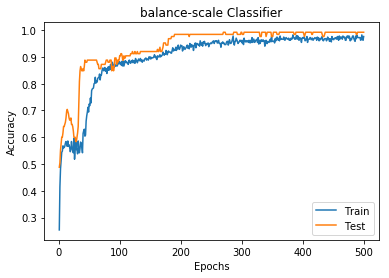

In [166]:
plt.plot(epochs, acc_treino, label='Train')
plt.plot(epochs, acc_teste, label='Test')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title("balance-scale Classifier")

plt.legend()

plt.show()